In [43]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mpl_dates

In [2]:
snyder_df = pd.read_csv('Zack_Snyder.csv')

In [3]:
snyder_df.head()

,tweet_id,created_at,tweets,likes
0,1377679318826946560,2021-04-01 17:48:40,We partnered with Prizeo to support @afspnatio...,10616
1,1374104044671700992,2021-03-22 21:01:48,"The official ZSJL whisperer, I bow to you my q...",60177
2,1373042855787204611,2021-03-19 22:45:01,I'll be joining @manvsgame &amp; @JoeManganiel...,32832
3,1372687390997770240,2021-03-18 23:12:31,Just a reminder @hbomax subscribers on how you...,35720
4,1372634319760486401,2021-03-18 19:41:38,So great to have the opportunity to work with ...,78788


In [4]:
#changing the date and time format
snyder_df['created_at'] = pd.to_datetime(snyder_df['created_at'], errors='coerce')

In [5]:
#seperating the date and time into their seperate columns
snyder_df['date'] = snyder_df['created_at'].dt.date
snyder_df['time'] = snyder_df['created_at'].dt.time

In [7]:
#showing the last 5 columns
snyder_df.tail()

,tweet_id,created_at,tweets,likes,date,time
195,588528448827621376,2015-04-16 02:24:51,Confirmed 4.20.15 #BatmanvSuperman @IMAX speci...,16639,2015-04-16,02:24:51
196,587831651801047041,2015-04-14 04:16:01,#IMAX #film #workout http://t.co/xmsFlzLqeo,3039,2015-04-14,04:16:01
197,580779917702365184,2015-03-25 17:14:57,http://t.co/5EroVNm0HP http://t.co/V6wunCBQEJ,4498,2015-03-25,17:14:57
198,568650209581858817,2015-02-20 05:55:49,There is only one true King. #unitetheseven ht...,26250,2015-02-20,05:55:49
199,542821004083347456,2014-12-10 23:19:47,Just wrapped an amazing few weeks filming in N...,2117,2014-12-10,23:19:47


In [8]:
#function to remove and get hastags
def getHashtags(tweet):
    tweet = tweet.lower()  #has to be in place
    tweet = re.findall(r'\#\w+',tweet) # Remove hastags with REGEX
    return " ".join(tweet)

In [9]:
snyder_df['Hashtags'] = snyder_df['tweets'].apply(getHashtags)
snyder_df.head()

,tweet_id,created_at,tweets,likes,date,time,Hashtags
0,1377679318826946560,2021-04-01 17:48:40,We partnered with Prizeo to support @afspnatio...,10616,2021-04-01,17:48:40,#stopsuicide
1,1374104044671700992,2021-03-22 21:01:48,"The official ZSJL whisperer, I bow to you my q...",60177,2021-03-22,21:01:48,
2,1373042855787204611,2021-03-19 22:45:01,I'll be joining @manvsgame &amp; @JoeManganiel...,32832,2021-03-19,22:45:01,#justiceisgray #stopsuicide #snydercut #usunited
3,1372687390997770240,2021-03-18 23:12:31,Just a reminder @hbomax subscribers on how you...,35720,2021-03-18,23:12:31,#snydercutwatchparty
4,1372634319760486401,2021-03-18 19:41:38,So great to have the opportunity to work with ...,78788,2021-03-18,19:41:38,


In [11]:
#saving to csv
snyder_df.to_csv('Snyder_hashtags.csv',index=False)

In [12]:
hashtags_list = snyder_df['Hashtags'].tolist()

#iterate over all hashtags so they can be split where there is more than one hashtag per row
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Use the Built-in Python Collections module to determine Unique count of all hashtags used
from collections import Counter
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtags', 'Count']
hashtags_df.sort_values(by='Count', ascending=False, inplace=True)
print (f'Total Number of Unique Hashtags is: {hashtags_df.shape[0]}.')

Total Number of Unique Hashtags is: 87.


In [13]:
hashtags_df["Percentage"] = 100*(hashtags_df["Count"]/hashtags_df['Count'].sum())
hashtags_df = hashtags_df.head(10)

In [14]:
hashtags_df

,Hashtags,Count,Percentage
2,#snydercut,27,10.588235
7,#zacksnydersjusticeleague,24,9.411765
11,#afsp,23,9.019608
3,#usunited,17,6.666667
53,#justiceleague,13,5.098039
35,#mentalhealthawarenessmonth,8,3.137255
67,#batmanvsuperman,7,2.745098
31,#dcfandome,6,2.352941
16,#superman,5,1.960784
17,#batman,5,1.960784


In [15]:
# you can modify this as you wish
def processor(row, input):
   # count the number of times the input (substring) occurs in the Hashtags column of that row
   return str(row['Hashtags']).lower().count(input)

In [16]:
csv_input = pd.read_csv('Snyder_hashtags.csv')

In [17]:
#get the number of times each hastag was used in each tweet
hashtag = "#snydercut"
csv_input[hashtag] = csv_input.apply(lambda row: processor(row, hashtag), axis=1)

hashtag1 = "#zacksnydersjusticeleague"
csv_input[hashtag1] = csv_input.apply(lambda row: processor(row, hashtag1), axis=1)

hashtag2 = "#afsp"
csv_input[hashtag2] = csv_input.apply(lambda row: processor(row, hashtag2), axis=1)

In [18]:
csv_input.head()

,tweet_id,created_at,tweets,likes,date,time,Hashtags,#snydercut,#zacksnydersjusticeleague,#afsp
0,1377679318826946560,2021-04-01 17:48:40,We partnered with Prizeo to support @afspnatio...,10616,2021-04-01,17:48:40,#stopsuicide,0,0,0
1,1374104044671700992,2021-03-22 21:01:48,"The official ZSJL whisperer, I bow to you my q...",60177,2021-03-22,21:01:48,NaN,0,0,0
2,1373042855787204611,2021-03-19 22:45:01,I'll be joining @manvsgame &amp; @JoeManganiel...,32832,2021-03-19,22:45:01,#justiceisgray #stopsuicide #snydercut #usunited,1,0,0
3,1372687390997770240,2021-03-18 23:12:31,Just a reminder @hbomax subscribers on how you...,35720,2021-03-18,23:12:31,#snydercutwatchparty,1,0,0
4,1372634319760486401,2021-03-18 19:41:38,So great to have the opportunity to work with ...,78788,2021-03-18,19:41:38,NaN,0,0,0


In [32]:
df_dates = csv_input[['date', '#snydercut', '#zacksnydersjusticeleague', '#afsp']]

In [33]:
df_dates.head()

,date,#snydercut,#zacksnydersjusticeleague,#afsp
0,2021-04-01,0,0,0
1,2021-03-22,0,0,0
2,2021-03-19,1,0,0
3,2021-03-18,1,0,0
4,2021-03-18,0,0,0


In [34]:
df_dates['date'] = pd.to_datetime(df_dates['date'])

<ipython-input-34-510910141018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['date'] = pd.to_datetime(df_dates['date'])


In [38]:
df_dates['date'] = pd.to_datetime(df_dates['date'])
df_dates = df_dates[~(df_dates['date'] < '2020-05-01')]

<ipython-input-38-32df578d5e0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['date'] = pd.to_datetime(df_dates['date'])


In [48]:
#giving the dates an interval of 10days
new_df = df_dates.groupby(pd.Grouper(key='date',freq='10D')).sum().reset_index()

In [49]:
new_df.head(60)

,date,#snydercut,#zacksnydersjusticeleague,#afsp
0,2020-05-01,0,0,3
1,2020-05-11,0,0,3
2,2020-05-21,0,0,2
3,2020-05-31,0,0,0
4,2020-06-10,0,0,0
5,2020-06-20,0,0,1
6,2020-06-30,0,0,0
7,2020-07-10,0,0,0
8,2020-07-20,0,0,0
9,2020-07-30,0,0,0


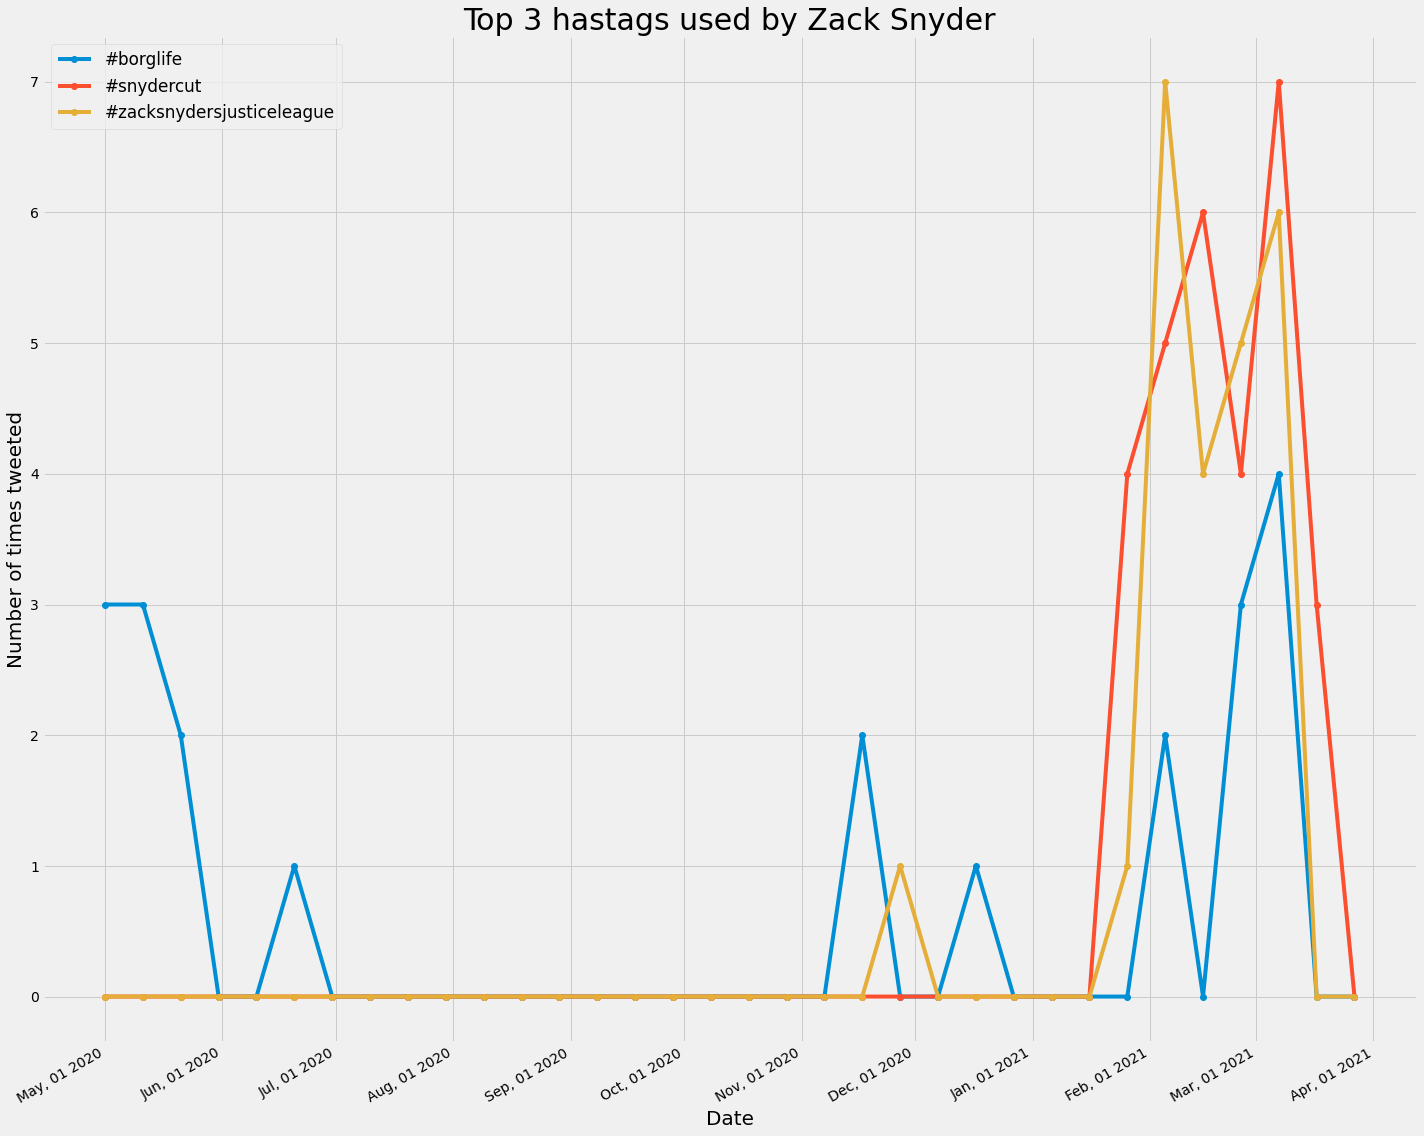

In [50]:
plt.plot_date(new_df['date'], new_df['#afsp'], linestyle = 'solid', label = '#borglife')
plt.plot_date(new_df['date'], new_df['#snydercut'], linestyle = 'solid', label = '#snydercut')
plt.plot_date(new_df['date'], new_df['#zacksnydersjusticeleague'], linestyle = 'solid', label = '#zacksnydersjusticeleague')
plt.legend(loc = 'best', fontsize = 'large')
plt.style.use('fivethirtyeight')
plt.title('Top 3 hastags used by Zack Snyder', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of times tweeted',  fontsize=20)
plt.rcParams['figure.figsize'] = (20,16)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
#plt.savefig('RayFisher.png', bbox_inches = "tight")
plt.show()